In [17]:
import tensorflow as tf
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.33,random_state=42)

In [8]:
#Preprocessing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
#Creating a Sequential Model
model=Sequential([Dense(4,activation='relu',input_shape=(X_train.shape[1],)),
                 Dense(2,activation='relu'),
                 Dense(1,activation='sigmoid')])

In [11]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
history=model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 27ms/step - loss: 0.7136 - accuracy: 0.5512 - val_loss: 0.6464 - val_accuracy: 0.6755
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6126 - accuracy: 0.6535 - val_loss: 0.5586 - val_accuracy: 0.7500
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5393 - accuracy: 0.7244 - val_loss: 0.4908 - val_accuracy: 0.8032
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4838 - accuracy: 0.7428 - val_loss: 0.4405 - val_accuracy: 0.8298
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4413 - accuracy: 0.7953 - val_loss: 0.4006 - val_accuracy: 0.8457
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4075 - accuracy: 0.8189 - val_loss: 0.3676 - val_accuracy: 0.8617
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3782 - accuracy: 0.8346 - val_loss: 0.3394 - val_accuracy: 0.8670
Epoch 8/100


In [13]:
model.evaluate(X_train,y_train)

12/12 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9895


[0.04696452617645264, 0.9895012974739075]

In [14]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.0656 - accuracy: 0.9787


[0.06559043377637863, 0.978723406791687]

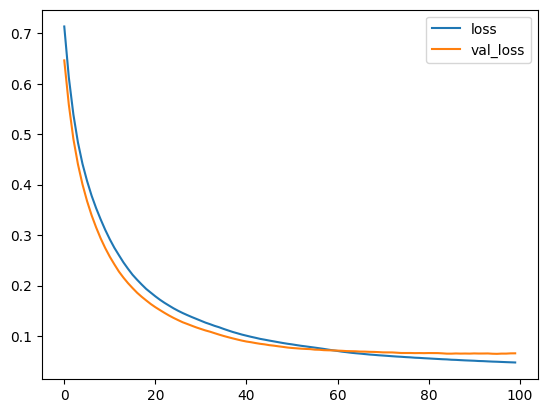

In [15]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [21]:
Results = np.round(model.predict(X_test)).flatten()

6/6 [==============================] - 0s 5ms/step


In [22]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(Results == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9787234042553191
6/6 [==============================] - 0s 6ms/step - loss: 0.0656 - accuracy: 0.9787
Evaluate output: [0.06559043377637863, 0.978723406791687]


**Saving the model**

In [23]:
model.save('linearclassifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

[<keras.src.layers.core.dense.Dense object at 0x7d0aa291a620>, <keras.src.layers.core.dense.Dense object at 0x7d0aa291a6b0>, <keras.src.layers.core.dense.Dense object at 0x7d0aa291b670>]
6/6 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9787


[0.06559043377637863, 0.978723406791687]